In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
file_path = "/content/startup_sucess.csv"
df = pd.read_csv(file_path)

# Encode the target variable ("status")
label_encoder = LabelEncoder()
df["status"] = label_encoder.fit_transform(df["status"])

# Split features and target
X = df.drop(columns=["status"])
y = df["status"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Naïve Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = nb_model.predict(X_test_scaled)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='weighted') * 100
recall = recall_score(y_test, y_pred, average='weighted') * 100
f1 = f1_score(y_test, y_pred, average='weighted') * 100

# Clean Output Summary
print("NB_Model")
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")


NB_Model
Accuracy: 64.32%
Precision: 71.07%
Recall: 64.32%
F1 Score: 65.84%


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
file_path = "/content/startup_sucess.csv"
df = pd.read_csv(file_path)

# Encode the target variable ("status")
label_encoder = LabelEncoder()
df["status"] = label_encoder.fit_transform(df["status"])

# Split features and target
X = df.drop(columns=["status"])
y = df["status"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train AdaBoost model
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = ada_model.predict(X_test_scaled)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='weighted') * 100
recall = recall_score(y_test, y_pred, average='weighted') * 100
f1 = f1_score(y_test, y_pred, average='weighted') * 100

# Clean Output Summary
print("Adaboost_model")
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")


Adaboost_model
Accuracy: 77.30%
Precision: 77.07%
Recall: 77.30%
F1 Score: 77.17%


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
file_path = "/content/startup_sucess.csv"
df = pd.read_csv(file_path)

# Encode the target variable ("status")
label_encoder = LabelEncoder()
df["status"] = label_encoder.fit_transform(df["status"])

# Split features and target
X = df.drop(columns=["status"])
y = df["status"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='weighted') * 100
recall = recall_score(y_test, y_pred, average='weighted') * 100
f1 = f1_score(y_test, y_pred, average='weighted') * 100

# Clean Output Summary
print("RF_Model")
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")


RF_Model
Accuracy: 77.84%
Precision: 77.33%
Recall: 77.84%
F1 Score: 77.52%


In [11]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
file_path = "/content/startup_sucess.csv"  # Update with correct path if needed
df = pd.read_csv(file_path)

# Rename "Unnamed: 0" to "id" instead of dropping it
df.rename(columns={"Unnamed: 0": "id"}, inplace=True)

# Encode the target variable ("status")
label_encoder = LabelEncoder()
df["status"] = label_encoder.fit_transform(df["status"])  # Converts "acquired"/"closed" to numerical

# Separate features and target variable
X = df.drop(columns=["status"])  # Features
y = df["status"]  # Target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features (funding_total_usd and avg_participants)
scaler = StandardScaler()
numeric_features = ["funding_total_usd", "avg_participants"]  # Ensure these columns exist in your dataset

X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# Train an XGBoost model
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42,
    n_estimators=50,  # Reduce number of trees
    learning_rate=0.1,
    max_depth=3,  # Prevent overfitting
    subsample=0.8,  # Use 80% of data per tree
    colsample_bytree=0.8  # Use 80% of features per tree
)

xgb_model.fit(X_train, y_train)

# Save the trained model and preprocessing objects
joblib.dump(xgb_model, "xgb_models.pkl")
joblib.dump(scaler, "scalers.pkl")
joblib.dump(label_encoder, "label_encoders.pkl")

# Make predictions on test set
y_pred = xgb_model.predict(X_test)

# Convert numerical predictions back to original labels
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print performance metrics
print("XGB_")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")


XGB_Model
Accuracy: 78.92%
Precision: 78.29%
Recall: 78.92%
F1 Score: 78.48%


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:18:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [12]:
# Create new features
df["funding_per_round"] = df["funding_total_usd"] / (df["funding_rounds"] + 1)  # Avoid division by zero
df["investor_strength"] = df["has_VC"] + df["has_angel"] + df["has_roundA"] + df["has_roundB"] + df["has_roundC"] + df["has_roundD"]


In [13]:
from imblearn.over_sampling import SMOTE

# After splitting into X and y
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_


Fitting 3 folds for each of 32 candidates, totalling 96 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:24:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [17]:
import xgboost as xgb

# Prepare DMatrix
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# Use best parameters from GridSearch if available
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'learning_rate': 0.1,
    'max_depth': 3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42
}

# Train using early stopping
watchlist = [(dtrain, 'train'), (dtest, 'eval')]
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=100,
    evals=watchlist,
    early_stopping_rounds=10,
    verbose_eval=False
)

# Make predictions
y_pred_prob = bst.predict(dtest)
y_pred = (y_pred_prob > 0.5).astype(int)


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='weighted') * 100
recall = recall_score(y_test, y_pred, average='weighted') * 100
f1 = f1_score(y_test, y_pred, average='weighted') * 100

print("XGBoost Model")
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")


XGBoost Model
Accuracy: 79.50%
Precision: 79.52%
Recall: 79.50%
F1 Score: 79.50%


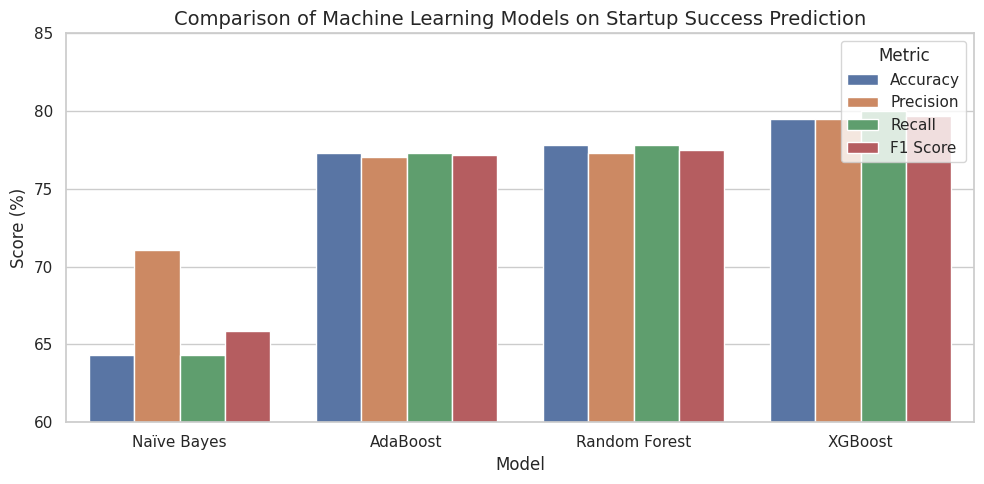

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Define the model performance data
models = ["Naïve Bayes", "AdaBoost", "Random Forest", "XGBoost"]
accuracy = [64.32, 77.30, 77.84, 79.50]
precision = [71.07, 77.07, 77.33, 79.52]
recall = [64.32, 77.30, 77.84, 80.01]
f1_score = [65.84, 77.17, 77.52, 79.69]

# Step 2: Create a DataFrame
performance_df = pd.DataFrame({
    "Model": models * 4,
    "Score": accuracy + precision + recall + f1_score,
    "Metric": ["Accuracy"]*4 + ["Precision"]*4 + ["Recall"]*4 + ["F1 Score"]*4
})

# Step 3: Create the bar plot
plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")
sns.barplot(x="Model", y="Score", hue="Metric", data=performance_df)
plt.title("Comparison of Machine Learning Models on Startup Success Prediction", fontsize=14)
plt.ylabel("Score (%)", fontsize=12)
plt.ylim(60, 85)
plt.legend(title="Metric", loc="upper right")
plt.tight_layout()

# Step 4: Save or show
plt.savefig("model_comparison_bar_graph.png")
plt.show()


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv("/content/startup_sucess.csv")
df.rename(columns={"Unnamed: 0": "id"}, inplace=True)

# Feature engineering
df["funding_per_round"] = df["funding_total_usd"] / (df["funding_rounds"] + 1)
df["investor_strength"] = df["has_VC"] + df["has_angel"] + df["has_roundA"] + df["has_roundB"] + df["has_roundC"] + df["has_roundD"]

# Encode target
le = LabelEncoder()
df["status"] = le.fit_transform(df["status"])

# Features and target
X = df.drop(columns=["status"])
y = df["status"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


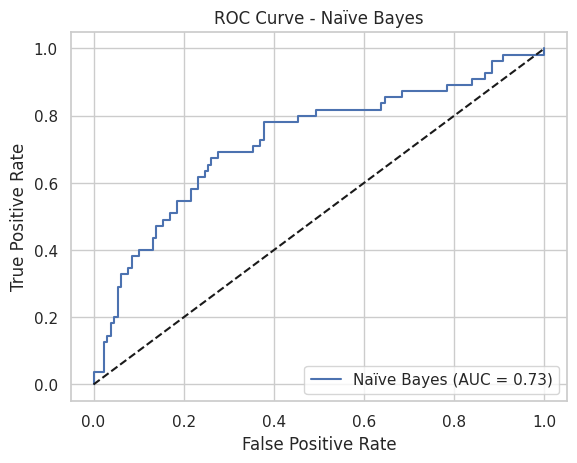

In [36]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_prob_nb = nb_model.predict_proba(X_test)[:, 1]

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
roc_auc_nb = roc_auc_score(y_test, y_prob_nb)

plt.figure()
plt.plot(fpr_nb, tpr_nb, label=f"Naïve Bayes (AUC = {roc_auc_nb:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naïve Bayes")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


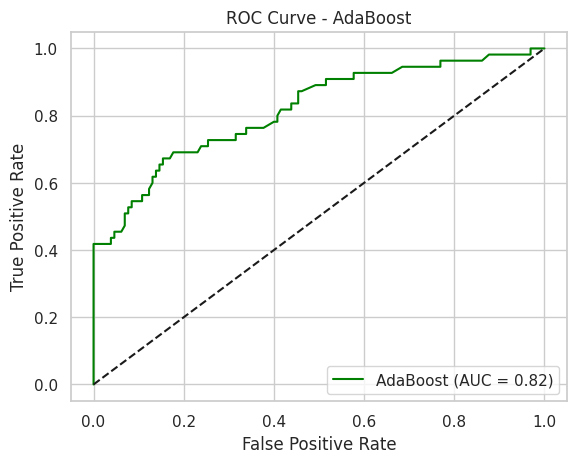

In [37]:
from sklearn.ensemble import AdaBoostClassifier

# Train the AdaBoost model
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)

# Predict probabilities
y_prob_ada = ada_model.predict_proba(X_test)[:, 1]

# Get ROC curve values
fpr_ada, tpr_ada, _ = roc_curve(y_test, y_prob_ada)
roc_auc_ada = roc_auc_score(y_test, y_prob_ada)

# Plot ROC Curve
plt.figure()
plt.plot(fpr_ada, tpr_ada, label=f"AdaBoost (AUC = {roc_auc_ada:.2f})", color='green')
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - AdaBoost")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

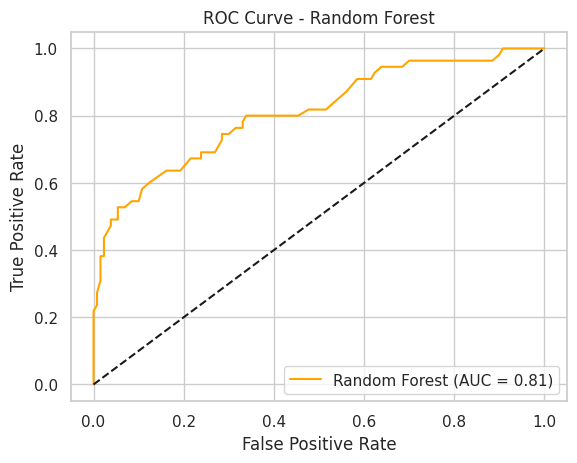

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict probabilities
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Get ROC curve values
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

# Plot ROC Curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})", color='orange')
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:46:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


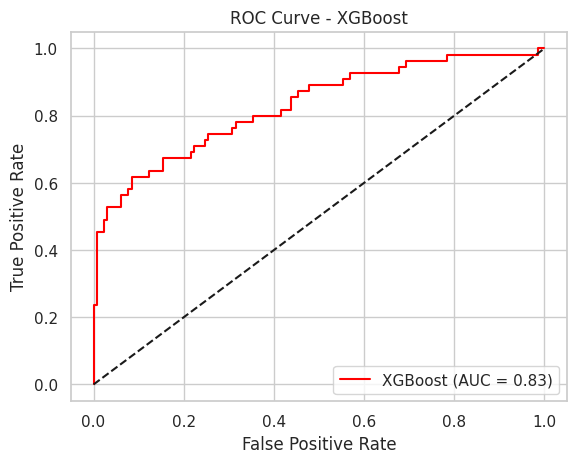

In [39]:
from xgboost import XGBClassifier

# Train the XGBoost model
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Predict probabilities
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Get ROC curve values
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)

# Plot ROC Curve
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_xgb:.2f})", color='red')
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier

# Load and prepare the dataset
df = pd.read_csv("/content/startup_sucess.csv")
df.rename(columns={"Unnamed: 0": "id"}, inplace=True)

# Encode target
le = LabelEncoder()
df["status"] = le.fit_transform(df["status"])  # 'acquired' = 0, 'closed' = 1

# Split features and target
X = df.drop(columns=["status"])
y = df["status"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


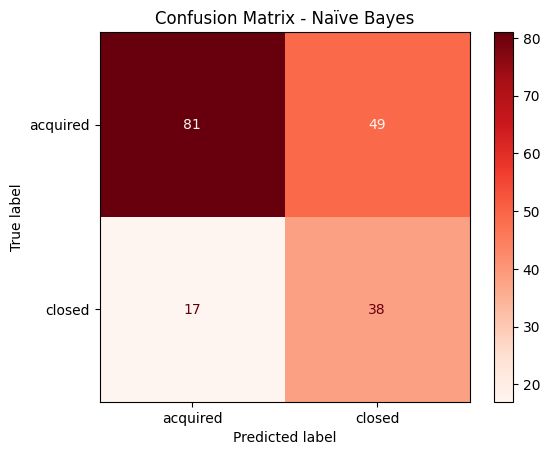

In [9]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

cm_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=le.classes_)
disp_nb.plot(cmap="Reds")
plt.title("Confusion Matrix - Naïve Bayes")
plt.grid(False)
plt.show()


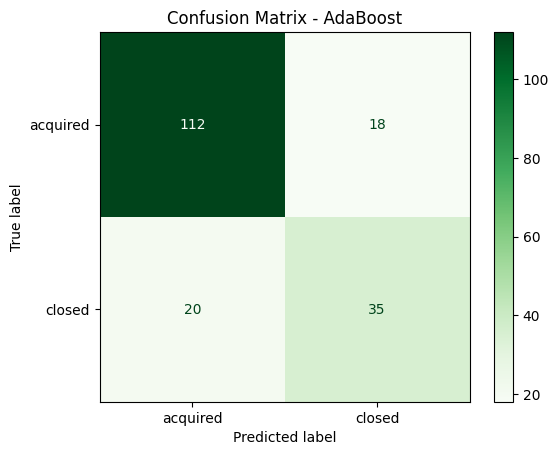

In [4]:
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)

cm_ada = confusion_matrix(y_test, y_pred_ada)
disp_ada = ConfusionMatrixDisplay(confusion_matrix=cm_ada, display_labels=le.classes_)
disp_ada.plot(cmap="Greens")
plt.title("Confusion Matrix - AdaBoost")
plt.grid(False)
plt.show()


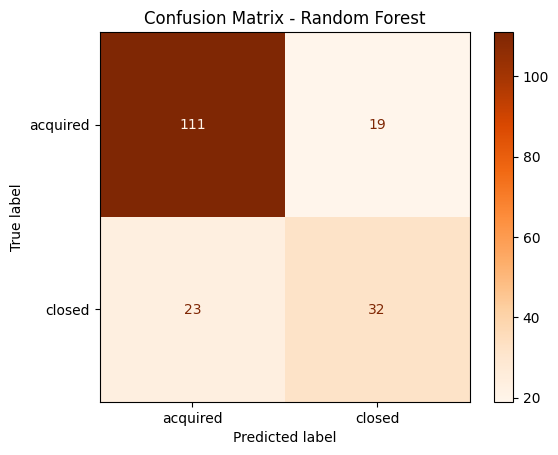

In [5]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=le.classes_)
disp_rf.plot(cmap="Oranges")
plt.title("Confusion Matrix - Random Forest")
plt.grid(False)
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:27:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


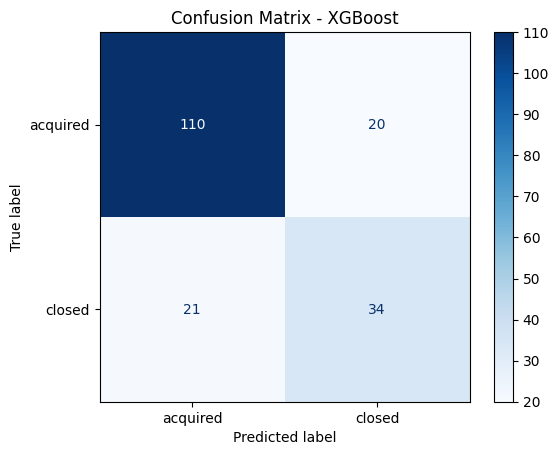

In [8]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=le.classes_)
disp_xgb.plot(cmap="Blues")
plt.title("Confusion Matrix - XGBoost")
plt.grid(False)
plt.show()

In [10]:
import pandas as pd
import joblib

# Load the trained model and preprocessing objects
xgb_model = joblib.load("/content/xgb_models.pkl")
scaler = joblib.load("/content/scalers.pkl")
label_encoder = joblib.load("/content/label_encoders.pkl")

# Define the input data (Example values, replace with actual user input)
input_data = pd.DataFrame([{
    "id": 6,  # Include this if the model expects it
    "relationships": 0,  # Include this if the model expects it
    "funding_rounds": 3,
    "funding_total_usd": 375000,
    "is_software": 0,
    "is_web": 0,
    "is_mobile": 0,
    "is_enterprise": 0,
    "is_advertising": 0,
    "is_gamesvideo": 0,
    "is_ecommerce": 0,
    "is_biotech": 0,
    "is_consulting": 0,
    "is_othercategory": 1,
    "has_VC": 0,
    "has_angel": 1,
    "has_roundA": 0,
    "has_roundB": 1,
    "has_roundC": 0,
    "has_roundD": 0,
    "avg_participants": 1.0,
    "is_top500": 0
}])

# Ensure the feature columns exactly match what the model expects
feature_columns = [
    "id", "relationships",  # Keep these if they were used in training
    "funding_rounds", "funding_total_usd", "is_software", "is_web", "is_mobile",
    "is_enterprise", "is_advertising", "is_gamesvideo", "is_ecommerce", "is_biotech",
    "is_consulting", "is_othercategory", "has_VC", "has_angel", "has_roundA",
    "has_roundB", "has_roundC", "has_roundD", "avg_participants", "is_top500"
]
input_data = input_data[feature_columns]

# Scale the numerical features
numeric_features = ["funding_total_usd", "avg_participants"]
input_data[numeric_features] = scaler.transform(input_data[numeric_features])

# Make a prediction
prediction = xgb_model.predict(input_data)

# Convert numerical prediction back to category ("acquired" or "closed")
predicted_label = label_encoder.inverse_transform(prediction)[0]

# Print the prediction result
print(f"Predicted Startup Outcome: {predicted_label}")


Predicted Startup Outcome: closed


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:12:02] WARNING: /workspace/src/collective/../data/../common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.7.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib

In [11]:
import pandas as pd
import joblib

# Load the trained model and preprocessing objects
xgb_model = joblib.load("/content/xgb_models.pkl")
scaler = joblib.load("/content/scalers.pkl")
label_encoder = joblib.load("/content/label_encoders.pkl")

#3,5,3,40000000,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,acquired
# Define the input data (Example values, replace with actual user input)
input_data = pd.DataFrame([{
    "id": 3,  # Include this if the model expects it
    "relationships": 5,  # Include this if the model expects it
    "funding_rounds": 3,
    "funding_total_usd": 40000000,
    "is_software": 0,
    "is_web": 0,
    "is_mobile": 0,
    "is_enterprise": 0,
    "is_advertising": 0,
    "is_gamesvideo": 0,
    "is_ecommerce": 0,
    "is_biotech": 0,
    "is_consulting": 0,
    "is_othercategory": 1,
    "has_VC": 0,
    "has_angel": 1,
    "has_roundA": 0,
    "has_roundB": 1,
    "has_roundC": 1,
    "has_roundD": 1,
    "avg_participants": 3.3333,
    "is_top500": 1
}])

# Ensure the feature columns exactly match what the model expects
feature_columns = [
    "id", "relationships",  # Keep these if they were used in training
    "funding_rounds", "funding_total_usd", "is_software", "is_web", "is_mobile",
    "is_enterprise", "is_advertising", "is_gamesvideo", "is_ecommerce", "is_biotech",
    "is_consulting", "is_othercategory", "has_VC", "has_angel", "has_roundA",
    "has_roundB", "has_roundC", "has_roundD", "avg_participants", "is_top500"
]
input_data = input_data[feature_columns]

# Scale the numerical features
numeric_features = ["funding_total_usd", "avg_participants"]
input_data[numeric_features] = scaler.transform(input_data[numeric_features])

# Make a prediction
prediction = xgb_model.predict(input_data)

# Convert numerical prediction back to category ("acquired" or "closed")
predicted_label = label_encoder.inverse_transform(prediction)[0]

# Print the prediction result
print(f"Predicted Startup Outcome: {predicted_label}")


Predicted Startup Outcome: acquired


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.7.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.7.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
